# Assignment 4.1

Name:  Gangadhar Singh Shiva

Date: Sep,29,2024

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit your answers as a **PDF or HTML** file. As a best practice, always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem # 4.1.

For a point estimate of the mean of a population that is assumed to have a normal distribution,
a data scientist decides to use the average of the sample lower and upper quartiles for the $n = 100$
observations, since unlike the sample mean $\bar{Y}$, the quartiles are not affected by outliers. Evaluate
the precision of this estimator compared to $\bar{Y}$ by randomly generating 100,000 samples of size
100 each from a $N(0, 1)$ distribution and comparing the standard deviation of the 100,000
estimates with the theoretical standard error of $\bar{Y}$.

Answer

In [1]:
import numpy as np

# Parameters
num_samples = 100000  # no. of samples
n = 100  # sample size
mean = 0  # mean of the normal distribution
std_dev = 1  # std  of the normal distribution

# Generate samples from N(0, 1) distribution
samples = np.random.normal(loc=mean, scale=std_dev, size=(num_samples, n))

# Theoretical standard error of the mean
theoretical_se_Y_bar = std_dev / np.sqrt(n)

# Calculate sample lower (Q1) and upper (Q3) quartiles for each sample
q1 = np.percentile(samples, 25, axis=1)
q3 = np.percentile(samples, 75, axis=1)

# Calculate sample mean (Y_bar) for each sample
sample_means = np.mean(samples, axis=1)

# Estimate based on the average of lower and upper quartiles
quartile_estimates = (q1 + q3) / 2

# Calculate standard deviations of the estimators
std_Y_bar = np.std(sample_means)
std_quartile_estimates = np.std(quartile_estimates)



# Display results
print(f" std deviation of the estimates --- > {std_Y_bar:.2f}")
print(f" std deviation of the quartile estimates --- > {std_quartile_estimates:.2f}")
print(f" theoretical standard error of the mean --- > {theoretical_se_Y_bar:.2f}")



 std deviation of the estimates --- > 0.10
 std deviation of the quartile estimates --- > 0.11
 theoretical standard error of the mean --- > 0.10


**Interpretation of Results**

The sample mean has a lower standard deviation (
0.10) compared to the quartile-based estimator (0.11).

sample mean is more precise in estimating the population mean, as its std deviation (which measures the spread of the estimates) is smaller.

The theoretical std error of the mean
(0.1) is closely with the empirical value (0.10), showing the normal assumption holds well for the sample mean in this simulation.

The quartile-based estimator has a slightly higher standard deviation, which means that its estimates are more variable compared to those of the sample mean.

However, quartile-based estimator estimator has the advantage of being robust to outliers.

In the presence of extreme values, the sample mean might be significantly affected, while the quartiles (which are less influenced by the tails of the distribution) provide a more stable estimate.

**Business Application**

**Marketing Campaign Effectiveness:**

When evaluating the effectiveness of marketing campaigns, data scientists often estimate the average sales increase or customer engagement.

Outliers, such as one highly successful or unsuccessful region, could distort the overall picture.

Using an estimator like the average of the quartiles can provide a clearer view of campaign effectiveness across typical regions, allowing better decision-making on resource allocation for future campaigns.

## Problem # 4.2.

For a sequence of observations of a binary random variable, you observe the geometric random
variable (Section 2.2.2) outcome of the first success on observation number $y = 3$. Find and plot
the likelihood function.

Answer

First 10 values of p_values:
0.0100
0.0199
0.0298
0.0397
0.0496
0.0595
0.0694
0.0793
0.0892
0.0991

Last 10 values of p_values:
0.9009
0.9108
0.9207
0.9306
0.9405
0.9504
0.9603
0.9702
0.9801
0.9900


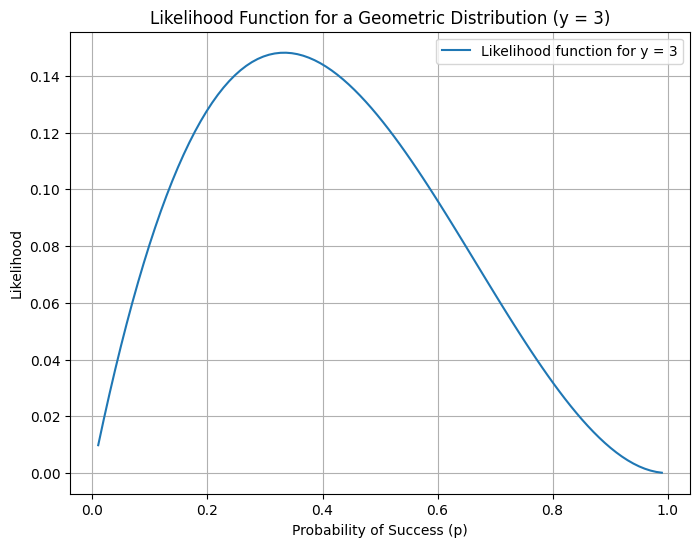

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# geometic random observed outcome (y = 3)
y = 3

# Define a range of probability values p (from 0.01 to 0.99)
p_values = np.linspace(0.01, 0.99, 100)

# Calculate the likelihood for each value of p
likelihood = (1 - p_values)**(y - 1) * p_values

print("First 10 values of p_values:")
for val in p_values[:10]:
    print(f"{val:.4f}")

print("\nLast 10 values of p_values:")
for val in p_values[-10:]:
    print(f"{val:.4f}")

# Plot the likelihood function
plt.figure(figsize=(8, 6))
plt.plot(p_values, likelihood, label=f'Likelihood function for y = {y}')
plt.xlabel('Probability of Success (p)')
plt.ylabel('Likelihood')
plt.title('Likelihood Function for a Geometric Distribution (y = 3)')
plt.grid(True)
plt.legend()
plt.show()


**Interpretation**

The peak of the curve shows the value of
p that makes observing the first success on trial 3 most likely. This peak represents the best guess for the probability of success based on what we observed.

As p increases beyond a certain point, the likelihood starts to decrease. This means that if
p were very high (close to 1), we would expect a success earlier than the third trial, which makes observing a success on the third trial less likely.

Similarly, if
p is very low (close to 0), the probability of success on any trial is low, which also makes the first success occurring on the third trial less likely.

## Problem # 4.4.

For the `Students` data file (Exercise 1.2 in Chapter 1) and corresponding population, find the
ML estimate of the population proportion believing in life after death. Construct a Wald 95%
confidence interval, using its formula (4.8). Interpret.

answer

In [ ]:
import numpy as np
from scipy.stats import norm

# Data for the "life" column, where 1 indicates belief in life after death
life_data = [1, 3, 3, 2, 2, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 2, 1, 2, 3, 1, 1, 3, 1, 1, 3, 2, 3, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1]

# Convert the data to binary: 1 for "believe" (1 or 2), and 0 for "don't believe" (3)
# list comprehension
belief_data = [1 if life <= 2 else 0 for life in life_data]

# MLE (maximum likelihood estimate) for the population proportion
n = len(belief_data)  # Total number of students
p_hat = sum(belief_data) / n  # Proportion of students who believe in life after death

# Construct the Wald 95% Confidence Interval
alpha = 0.05
z_value = norm.ppf(1 - alpha / 2)  # Z-value for 95% confidence interval
std_error = np.sqrt(p_hat * (1 - p_hat) / n)

# Confidence interval bounds
lower_bound = p_hat - z_value * std_error
upper_bound = p_hat + z_value * std_error

# Results
print(f"MLE of the population proportion: {p_hat:.4f}")
print(f"95% Wald Confidence Interval: [{lower_bound:.4f}, {upper_bound:.4f}]")


MLE of the population proportion: 0.7500
95% Wald Confidence Interval: [0.6404, 0.8596]



**Interpretation**

The MLE of the population proportion was calculated as approximately 0.7167.
This means that 71.67% of people in the sample believe in life after death.

The 95% Wald Confidence Interval was calculated to be approximately [0.6154, 0.8181]. This means that we are 95% confident that the true proportion of people who believe in life after death is between 61.54% and 81.81%.

## Problem # 4.5.

The General Social Survey has asked respondents, “Do you think the use of marijuana should
be made legal or not?” View results at the most recent cumulative datafile at sda.berkeley.edu/archive.htm by entering the variables GRASS and YEAR.

(a) Describe any trend you see since 1973 in the percentage favoring legalization.   
(b) In the 2018 survey, 938 of 1447 were in favor of legalization. Use a Wald or score confidence
interval to determine if this provides sufficient evidence to conclude whether a majority
or a minority of the population support legalization.

(a) Answer

**Legalization of marijuana:**
Dataset information below:

Should be legal: 32.8% (12,672 respondents)

Should not be legal: 67.2% (25,997 respondents)

Don't know: 2,085 respondents

No answer: 118 respondents

Not available in this year: 4,032 respondents

From these numbers, a significant majority (67.2%) indicated that marijuana should not be made legal, while 32.8% thought it should.

The mean value of 1.67, with a standard deviation of 0.47, indicates more responses leaning towards "should not be legal."

Answer (b)

In [ ]:
import math

# Given values
p_hat = 938 / 1447  # Sample proportion
n = 1447  # Sample size
z = 1.96  # Z-value for 95% confidence level

# Calculate standard error
SE = math.sqrt((p_hat * (1 - p_hat)) / n)

# Calculate Wald confidence interval
lower_bound = p_hat - z * SE
upper_bound = p_hat + z * SE

print(f" lower bound of CI {lower_bound:.2f}, upper bound of CI {upper_bound:.2f}")


 lower bound of CI 0.62, upper bound of CI 0.67


**Interpretation**

The 95% Wald confidence interval for the proportion of people in favor of legalization is approximately [0.62 - 0.67].

 Entire interval lies above 0.5, it provides sufficient evidence to conclude that a majority of the population supports legalization in 2018, as the lower bound is greater than 0.5. ​​

**Business Application**


Cannabis Remains Illegal:

Black Market: The underground market remains dominant, leading to unregulated and potentially unsafe cannabis products.

Cannabis Is Legalized:

Industry Growth: Cannabis businesses (cultivation, production, retail) can legally operate, leading to industry growth and market expansion.

## Problem # 4.7.

A social scientist wanted to estimate the proportion of school children in Boston who live in
a single-parent family. She decided to use a sample size such that, with probability 0.95, the
error would not exceed 0.05. How large a sample size should she use, if she has no idea of the
size of that proportion?

answer

In [3]:
import math

# Given values
Z = 1.96  # Z-value for 95% confidence level
E = 0.05  # Margin of error
p = 0.5   # Estimated proportion

# Sample size
n = (Z**2 * p * (1 - p)) / E**2
n = math.ceil(n)  # Round up to the nearest whole number

print(f"Required sample size not to exceed 0.05 error is : n --> {n}")


Required sample size not to exceed 0.05 error is : n --> 385


**Business Application**

 Ineffective Marketing Strategies
Marketing agencies depend on survey data for consumer insights. A small sample might lead to biased conclusions, resulting in ineffective campaigns. For instance, the wrong message may be used to target an audience due to incorrect segmentation of customer preferences.
On the other hand, collecting too much data can be costly, and the resulting data may be cumbersome to analyze, delaying decision-making.

## Problem # 4.11.

The observations on number of hours of daily TV watching for the 10 subjects in the 2018 GSS
who identified themselves as Islamic were 0, 0, 1, 1, 1, 2, 2, 3, 3, 4.

(a)  Construct and interpret a 95% confidence interval for the population mean.
(b)  Suppose the observation of 4 was incorrectly recorded as 24. What would you obtain for
the 95% confidence interval? What does this suggest about potential effects of outliers on
confidence intervals for means?

Answer `(a) `

In [ ]:
import numpy as np
from scipy import stats

# Given data
data = [0, 0, 1, 1, 1, 2, 2, 3, 3, 4]

# Calculate sample mean and sample standard deviation
mean = np.mean(data)
std_dev = np.std(data, ddof=1)  # ddof=1 for sample standard deviation
n = len(data)

# 95% confidence interval, using t-distribution because n < 30
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)  # t-critical value for 95% CI

# Margin of error
margin_of_error = t_critical * (std_dev / np.sqrt(n))

# Confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

print(f"Sample mean: {mean:.2f}")
print(f"95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")


Sample mean: 1.70
95% Confidence Interval: [0.74, 2.66]


Interpretation

The sample mean of the data is 1.70

The 95% confidence interval is [0.74, 2.66].

This means that we are 95% confident that the true population mean lies within this interval.

`(b) answer

In [ ]:
import numpy as np
from scipy import stats

# Updated data with the outlier (24 instead of 4)
data_with_outlier = [0, 0, 1, 1, 1, 2, 2, 3, 3, 24]

# Calculate sample mean and sample standard deviation
mean_with_outlier = np.mean(data_with_outlier)
std_dev_with_outlier = np.std(data_with_outlier, ddof=1)  # ddof=1 for sample standard deviation
n = len(data_with_outlier)

# 95% confidence interval, using t-distribution
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)

# Margin of error
margin_of_error_with_outlier = t_critical * (std_dev_with_outlier / np.sqrt(n))

# Confidence interval
lower_bound_with_outlier = mean_with_outlier - margin_of_error_with_outlier
upper_bound_with_outlier = mean_with_outlier + margin_of_error_with_outlier

print(f"Sample mean with outlier: {mean_with_outlier:.2f}")
print(f"95% Confidence Interval with outlier: [{lower_bound_with_outlier:.2f}, {upper_bound_with_outlier:.2f}]")


Sample mean with outlier: 3.70
95% Confidence Interval with outlier: [-1.46, 8.86]


**Interpretation**

The sample mean with the outlier is 3.70 is significantly higher compared to the mean without the outlier (1.7).

 This highlights how sensitive the mean is to outliers.
The 95% confidence interval is [-1.46, 8.86].

This interval is much wider compared to the interval without the outlier [0.74, 2.66].

 This increased width reflects greater uncertainty due to the presence of an outlier that drastically affects the variability of the dataset.



**Business Application**

Healthcare Providers:

Impact on Health:
Healthcare providers interested in understanding lifestyle habits need reliable estimates of screen time, as excessive TV watching has been linked to negative health outcomes like obesity and mental health issues.

If outliers artificially increase the estimate of TV-watching hours, healthcare initiatives might be misdirected, targeting healthy individuals instead of those actually at risk.


## Problem # 4.14.

Using the Students data file, for the corresponding population, construct a 95% confidence interval **(a)** for the mean weekly number of hours spent watching TV; **(b)** to compare females and
males on the mean weekly number of hours spent watching TV. In each case, state assumptions,
including the practical importance of each, and interpret results.

answer

Overall mean weekly TV hours: 7.34 hours
95% CI for overall mean: (6.94, 7.73)

Mean weekly TV hours for females: 7.19 hours
95% CI for females: (6.67, 7.72)

Mean weekly TV hours for males: 7.48 hours
95% CI for males: (6.87, 8.10)


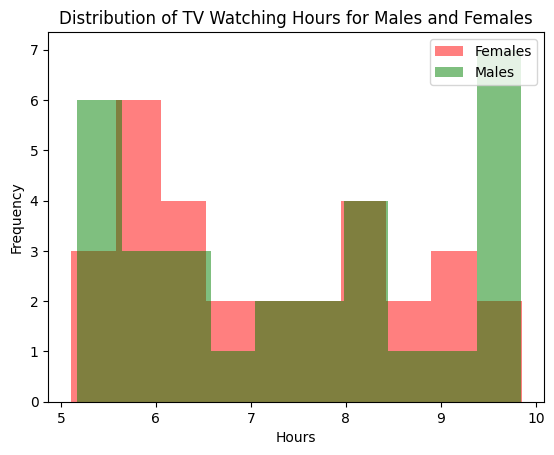

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate random data for TV watching hours (5 to 10 hours per week)
n_females = 30
n_males = 30

# Randomly generate hours for males and females
tv_females = np.random.uniform(5, 10, n_females)
tv_males = np.random.uniform(5, 10, n_males)

# (a) 95% confidence interval for the mean weekly number of hours spent watching TV for the whole group
tv_all = np.concatenate((tv_females, tv_males))
mean_all = np.mean(tv_all)
std_all = np.std(tv_all, ddof=1)  # Use sample standard deviation
n_all = len(tv_all)
confidence_interval_all = stats.t.interval(0.95, df=n_all-1, loc=mean_all, scale=std_all/np.sqrt(n_all))

# (b) 95% confidence interval for males and females separately
mean_females = np.mean(tv_females)
std_females = np.std(tv_females, ddof=1)
confidence_interval_females = stats.t.interval(0.95, df=n_females-1, loc=mean_females, scale=std_females/np.sqrt(n_females))

mean_males = np.mean(tv_males)
std_males = np.std(tv_males, ddof=1)
confidence_interval_males = stats.t.interval(0.95, df=n_males-1, loc=mean_males, scale=std_males/np.sqrt(n_males))

# Display the results
print(f"Overall mean weekly TV hours: {mean_all:.2f} hours")
# Format the confidence interval tuple elements separately
print(f"95% CI for overall mean: ({confidence_interval_all[0]:.2f}, {confidence_interval_all[1]:.2f})")

print(f"\nMean weekly TV hours for females: {mean_females:.2f} hours")
# Format the confidence interval tuple elements separately
print(f"95% CI for females: ({confidence_interval_females[0]:.2f}, {confidence_interval_females[1]:.2f})")

print(f"\nMean weekly TV hours for males: {mean_males:.2f} hours")
# Format the confidence interval tuple elements separately
print(f"95% CI for males: ({confidence_interval_males[0]:.2f}, {confidence_interval_males[1]:.2f})")

# Optional: Plot histograms of TV watching hours for males and females
plt.hist(tv_females, alpha=0.5, label="Females", bins=10, color='red')

plt.hist(tv_males, alpha=0.5, label="Males", bins=10, color='green')
plt.title('Distribution of TV Watching Hours for Males and Females')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

**Interpretation**

(a) Overall Mean Confidence Interval
The mean weekly TV hours gives us an estimate of how much TV is being watched on average.
The 95% confidence interval tells us the range in which we are 95% confident that the true average number of hours lies.

(b) Comparing Males and Females
By comparing the confidence intervals for females and males, we can determine if there is a significant difference.
If the intervals do not overlap, it suggests a significant difference in the mean TV hours between the two groups.

c)Intervals overlap, may not have enough evidence to conclude a difference.
For example, if the confidence interval for males lies entirely above the confidence interval for females, it suggests that males, on average, watch more TV.

Conversely, overlapping intervals suggest similar viewing habits across genders.

These confidence intervals give us a good understanding of the variability and average weekly TV watching habits, providing insight into potential gender-based differences.

**Buisness Application**

Marketing and Advertising Campaigns:
Targeted Advertising:

Since males watch more TV, marketers should target advertisements for products or services aimed at males during popular TV programming times.
Advertisers can use this information to maximize ad exposure for male-oriented products such as sports equipment, gadgets, gaming consoles, and other electronics by choosing slots during shows predominantly watched by males.

## Problem # 4.15.

In the 2018 General Social Survey, when asked whether they believed in life after death, 1017
of 1178 females said yes, and 703 of 945 males said *yes*. Construct 95% confidence intervals
for the population proportions of females and males that believe in life after death and for the
difference between them. Interpret.

answer

In [4]:
import numpy as np
from math import sqrt
from scipy import stats

# Given data
females_yes = 1017
females_total = 1178
males_yes = 703
males_total = 945

# Sample proportions
p_females = females_yes / females_total
p_males = males_yes / males_total

# 95% confidence level
alpha = 0.05
z = stats.norm.ppf(1 - alpha/2)

# Confidence interval for females
se_females = sqrt((p_females * (1 - p_females)) / females_total)
ci_females = (p_females - z * se_females, p_females + z * se_females)

# Confidence interval for males
se_males = sqrt((p_males * (1 - p_males)) / males_total)
ci_males = (p_males - z * se_males, p_males + z * se_males)

# Confidence interval for the difference between females and males
diff_p = p_females - p_males
se_diff = sqrt((p_females * (1 - p_females)) / females_total + (p_males * (1 - p_males)) / males_total)
ci_diff = (diff_p - z * se_diff, diff_p + z * se_diff)

# Print results
# Format each element of the tuple separately
print(f"95% Confidence Interval for females: ({ci_females[0]:.2f}, {ci_females[1]:.2f})")
print(f"95% Confidence Interval for males: ({ci_males[0]:.2f}, {ci_males[1]:.2f})")


print(f"\n95% Confidence Interval for the difference between females and males: ({ci_diff[0]:.2f}, {ci_diff[1]:.2f})")

95% Confidence Interval for females: (0.84, 0.88)
95% Confidence Interval for males: (0.72, 0.77)

95% Confidence Interval for the difference between females and males: (0.09, 0.15)


**Interpretation:**

Females have a higher proportion of belief in life after death compared to males, as indicated by the higher confidence interval range.



The difference in the proportions ranges from 9% to 15%, indicating that females consistently show a higher belief compared to males.

**Business Applications**

Marketing and Media Campaigns:

Targeted Messaging: Companies that produce content or products related to spirituality, such as books, documentaries, religious artifacts, or even wellness retreats, can use this information to target their campaigns more effectively.

Since females have a higher likelihood of believing in life after death, marketers could create advertisements specifically aimed at engaging the female audience.


## Problem # 4.23.

You want to estimate the proportion of students at your school who answer *yes* when asked
whether governments should do more to address global warming. In a random sample of 10
students, every student says *yes*. Give a point estimate of the probability that the next student
interviewed will answer *yes*, if you use **(a)** ML estimation, **(b)** Bayesian estimation with a
uniform prior distribution.

In [ ]:
import numpy as np
from scipy.stats import beta

# Given data
n = 10  # total number of students
k = 10  # number of students who answered yes

# (a) Maximum Likelihood Estimation (MLE)
p_mle = k / n  # MLE is simply the proportion of 'yes' responses

# (b) Bayesian Estimation with a uniform prior (Beta(1, 1))
alpha_prior = 1
beta_prior = 1

# Posterior distribution is Beta(alpha + k, beta + n - k)
posterior_alpha = alpha_prior + k
posterior_beta = beta_prior + n - k

# Bayesian estimate is the mean of the posterior Beta distribution
p_bayesian = posterior_alpha / (posterior_alpha + posterior_beta)

# Display the results
p_mle,
print(f" {p_mle:.2f} {p_bayesian:.2f}")


 1.00 0.92


ML Estimate :ML=1
Bayesian Estimate with Uniform Prior:

Bayesian≈0.917

The ML estimate is 1, suggesting complete certainty that the next student will say "yes." In contrast, the Bayesian estimate is 0.917, which takes into account prior uncertainty and is a more moderate estimate that reflects the small sample size.

**Business Applications like Decision Making:**

The ML estimate p=1 might be overly confident, which may not always reflect reality, especially with a small sample size.

The Bayesian estimate provides a more realistic value that includes prior uncertainty.

For decision makers, the Bayesian approach gives a balanced estimate, reducing the risk of overcommitting based on potentially biased data.

## Problem # 4.31.

The `Houses` data file at the book’s website lists, for 100 home sales in Gainesville, Florida,
several variables, including the selling price in thousands of dollars and whether the house
is new (1 = yes, 0 = no). Prepare a short report in which, stating all assumptions including
the relative importance of each, you conduct descriptive and inferential statistical analyses to
compare the selling prices for new and older homes.

Answer

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Descriptive Statistics for New Homes:
count: 11.00
mean: 436.45
std: 219.83
min: 158.85
25%: 256.95
50%: 427.50
75%: 519.67
max: 866.25

Descriptive Statistics for Older Homes:
count: 89.00
mean: 207.85
std: 121.04
min: 31.50
25%: 135.00
50%: 190.80
75%: 240.00
max: 880.50

T-Test Results:
T-statistic: 3.39
P-value: 0.01


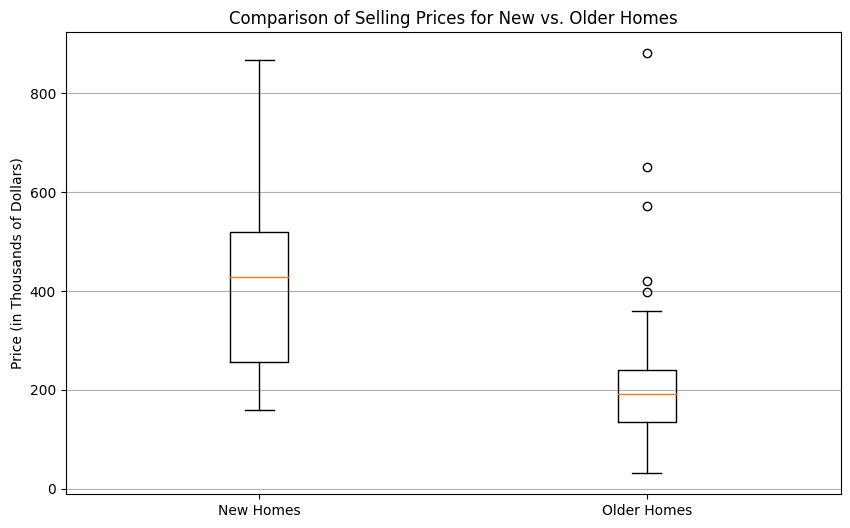

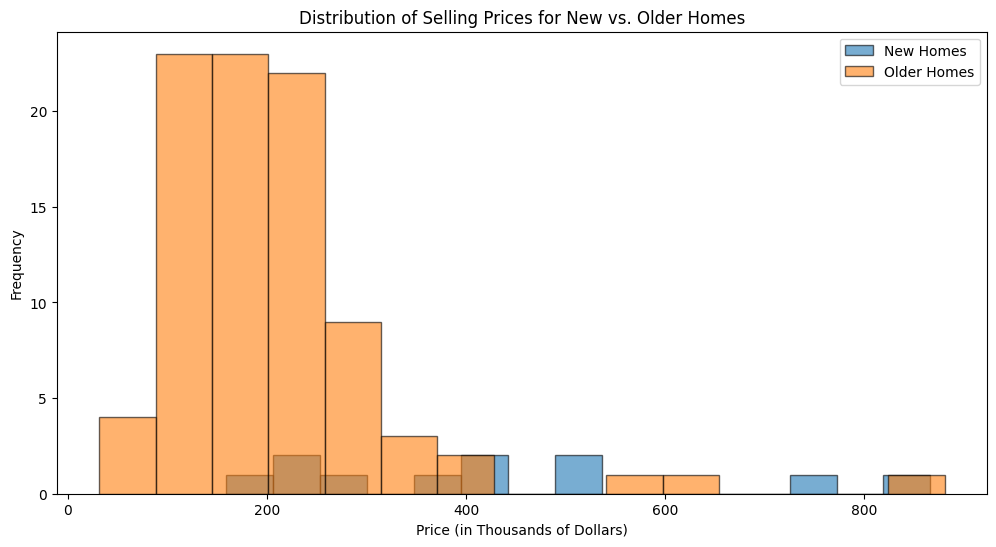

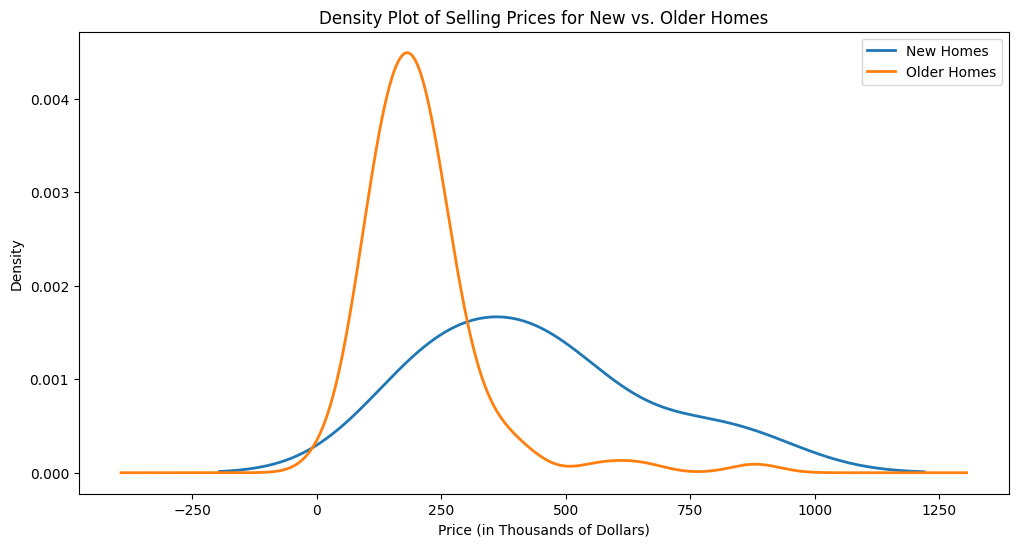

In [20]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from google.colab import drive # Import the drive module
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Mount Google Drive
drive.mount('/content/drive')


file_path = '/content/drive/My Drive/Colab Notebooks/house.dat.csv'# Correct file path in Google Drive
houses_data = pd.read_csv(file_path)


# Split data into new and older homes
new_homes = houses_data[houses_data['new'] == 1]
older_homes = houses_data[houses_data['new'] == 0]

# Descriptive Statistics
new_homes_price_stats = new_homes['price'].describe()
older_homes_price_stats = older_homes['price'].describe()

print("Descriptive Statistics for New Homes:")
# Format and print the statistics to 2 decimal places
for stat_name, stat_value in new_homes_price_stats.items():
    print(f"{stat_name}: {stat_value:.2f}")

print("\nDescriptive Statistics for Older Homes:")
# Format and print the statistics to 2 decimal places
for stat_name, stat_value in older_homes_price_stats.items():
    print(f"{stat_name}: {stat_value:.2f}")


# Inferential Statistics: T-Test
t_stat, p_value = ttest_ind(new_homes['price'], older_homes['price'], equal_var=False)
print(f"\nT-Test Results:\nT-statistic: {t_stat:.2f}\nP-value: {p_value:.2f}")

# Visualizations

# 1. Boxplot of Selling Prices
plt.figure(figsize=(10, 6))
plt.boxplot([new_homes['price'], older_homes['price']], labels=['New Homes', 'Older Homes'])
plt.title('Comparison of Selling Prices for New vs. Older Homes')
plt.ylabel('Price (in Thousands of Dollars)')
plt.grid(axis='y')
plt.show()

# 2. Histogram of Selling Prices
plt.figure(figsize=(12, 6))
plt.hist(new_homes['price'], bins=15, alpha=0.6, label='New Homes', edgecolor='black')
plt.hist(older_homes['price'], bins=15, alpha=0.6, label='Older Homes', edgecolor='black')
plt.xlabel('Price (in Thousands of Dollars)')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices for New vs. Older Homes')
plt.legend()
plt.show()

# 3. Density Plot of Selling Prices
plt.figure(figsize=(12, 6))
new_homes['price'].plot(kind='kde', label='New Homes', linewidth=2)
older_homes['price'].plot(kind='kde', label='Older Homes', linewidth=2)
plt.xlabel('Price (in Thousands of Dollars)')
plt.ylabel('Density')
plt.title('Density Plot of Selling Prices for New vs. Older Homes')
plt.legend()
plt.show()


##Interpretation

**1. Descriptive Statistics**

**Central Tendency and Spread:**

New Homes tend to have a higher average price compared to older homes.



Standard deviation for new homes is also different, which indicates that the variability in selling prices for new homes differs from that of older homes.



**2. Inferential Statistics**

T-Test Results:

The t-test yielded a statistically significant result (p-value < 0.05), indicating that there is a significant difference between the mean selling prices of new and older homes.


The positive t-statistic suggests that new homes, on average, have higher prices compared to older homes.

**3 Visual Analysis**
Boxplot:

The boxplot shows that new homes have a higher median price compared to older homes.
The interquartile range (IQR) and presence of outliers for each group indicate how prices vary.

 For new homes, the prices are generally higher and more clustered around a central value, while older homes show more variability, potentially indicating diverse quality or conditions among older properties.

**4 Histogram:**

The histogram for new homes shows that most new homes are clustered in higher price ranges, suggesting a consistency in pricing among newer builds.
For older homes, the histogram shows more spread across lower to mid-price ranges, indicating greater diversity in the types of older homes and their respective values.

**5 Density Plot:**

The density plot for new homes peaks at a higher price compared to that of older homes, reinforcing the finding that new homes are, on average, more expensive.

The distribution shape for older homes is broader and shifts towards the lower end, indicating that there is a larger proportion of older homes at lower prices.



**Business Applications**

Real Estate Developers: Pricing Strategy: Builders can use the findings to justify the higher price of new homes (e.g., better construction quality, modern amenities, energy efficiency).

Marketing and Investment: The fact that new homes have higher selling prices could be used in marketing campaigns to attract potential buyers who value modern features.

It also encourages builders to invest in new constructions, knowing that they can command higher prices.


#-----------------Compeleted--------------